In [1]:
%matplotlib notebook

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
import seaborn; seaborn.set()

In [6]:
from datetime import datetime

In [7]:
amz = pd.read_csv('data/juan-amazon.csv')

In [8]:
amz['month'] = amz['date'].apply(lambda x: pd.Period(datetime.strptime(x, '%m/%d/%y').strftime('%Y-%m')))

In [9]:
amz = amz.set_index('month')

In [10]:
amz = amz.sort_index()

In [11]:
rng = pd.date_range('2011/06/01', '2018/09/01', freq='MS').strftime('%Y-%m')

In [12]:
rng = pd.period_range('2011-06', periods=88, freq='M')

In [13]:
months = pd.Series(np.zeros(rng.size), index=rng)

In [14]:
result = pd.DataFrame({'total': amz.groupby('month').sum()['amount'], 'orders': amz.groupby('month').count()['amount']}, index=amz.index.unique())

In [15]:
result['cumsum'] = result['total'].cumsum();

In [16]:
result = result.add(months, axis=0)

In [17]:
result = result.fillna(value={'orders': 0, 'total': 0})

In [18]:
result = result.fillna(method='ffill')

<IPython.core.display.Javascript object>


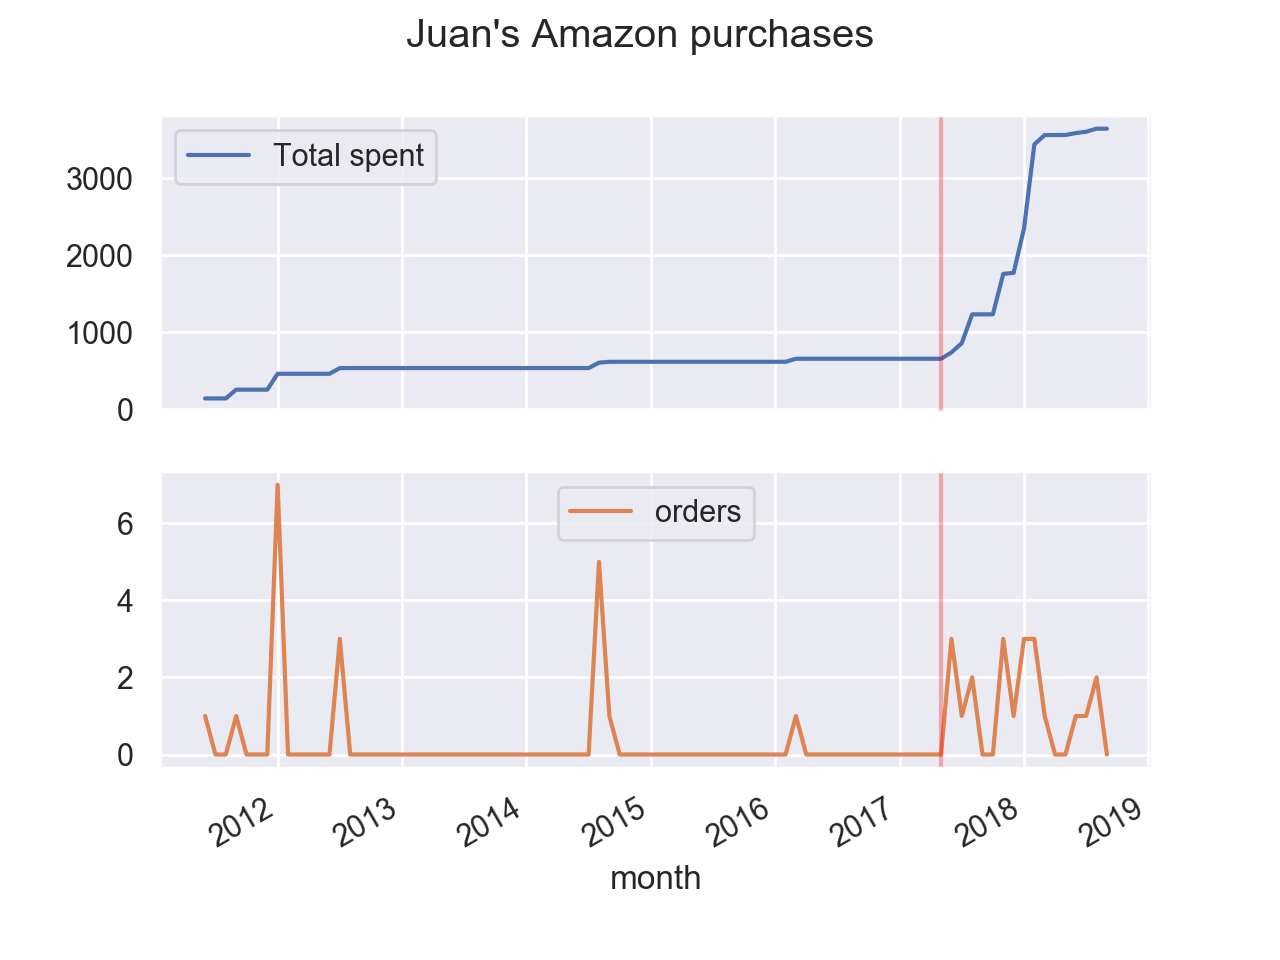

In [19]:
ax = result.plot(label=['Total spent', 'orders'], y=['cumsum', 'orders'], legend='Total Spent', title="Juan's Amazon purchases", use_index=True, subplots=True)

In [20]:
ax[0].axvline(pd.Period('2017-05'), alpha=0.3, color='red');

In [21]:
ax[1].axvline(pd.Period('2017-05'), alpha=0.3, color='red');